In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#先讀檔

In [8]:
a=pd.read_excel("C:/Users/ph871/Downloads/Concrete_Data.xls")

In [9]:
a

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


#怕標頭的編碼不一樣，將它重新轉了一下

In [10]:
a.columns=['A','B','C','D','E','F','G','H','I']

In [11]:
b = ["Cement (component 1)(kg in a m^3 mixture)","Blast Furnace Slag (component 2)(kg in a m^3 mixture)","Fly Ash (component 3)(kg in a m^3 mixture)","Water (component 4)(kg in a m^3 mixture)","Superplasticizer (component 5)(kg in a m^3 mixture)","Coarse Aggregate (component 6)(kg in a m^3 mixture)","Fine Aggregate (component 7)(kg in a m^3 mixture)","Age (day)","Concrete compressive strength(MPa, megapascals)"]

In [12]:
a.columns=[b]

#相關係數

In [13]:
cm=np.corrcoef(a[b].values.T)

In [14]:
cm

array([[ 1.        , -0.27519344, -0.39747544, -0.08154361,  0.09277137,
        -0.10935604, -0.22272017,  0.08194726,  0.49783272],
       [-0.27519344,  1.        , -0.32356947,  0.10728594,  0.04337574,
        -0.28399823, -0.28159326, -0.0442458 ,  0.13482445],
       [-0.39747544, -0.32356947,  1.        , -0.257044  ,  0.37733956,
        -0.00997679,  0.07907635, -0.15437016, -0.10575335],
       [-0.08154361,  0.10728594, -0.257044  ,  1.        , -0.65746444,
        -0.18231167, -0.45063498,  0.27760443, -0.28961348],
       [ 0.09277137,  0.04337574,  0.37733956, -0.65746444,  1.        ,
        -0.26630276,  0.22250149, -0.19271652,  0.3661023 ],
       [-0.10935604, -0.28399823, -0.00997679, -0.18231167, -0.26630276,
         1.        , -0.17850575, -0.00301551, -0.16492782],
       [-0.22272017, -0.28159326,  0.07907635, -0.45063498,  0.22250149,
        -0.17850575,  1.        , -0.15609405, -0.16724896],
       [ 0.08194726, -0.0442458 , -0.15437016,  0.27760443, -0

#畫出熱度圖

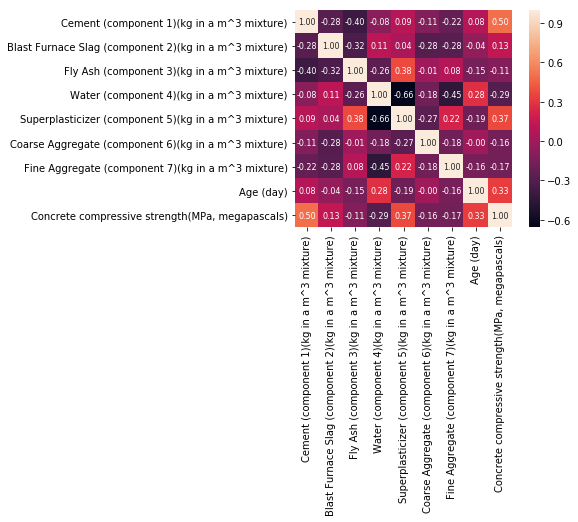

In [15]:
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":8},yticklabels=b,xticklabels=b)

#資料清整

In [16]:
c=StandardScaler()
d=c.fit_transform(a)

C:\Users\ph871\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ph871\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
a_clean=pd.DataFrame(d,columns=(b))

In [18]:
a_clean['Concrete compressive strength(MPa, megapascals)']=a['Concrete compressive strength(MPa, megapascals)']

In [19]:
a_clean

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,79.986111
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,61.887366
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,40.269535
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,41.052780
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,44.296075
5,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,0.702224,47.029847
6,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,43.698299
7,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,36.447770
8,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,-0.279733,45.854291
9,1.855649,-0.856886,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,39.289790


#將數據分成training set和 test set

In [21]:
e=["Cement (component 1)(kg in a m^3 mixture)","Blast Furnace Slag (component 2)(kg in a m^3 mixture)","Fly Ash (component 3)(kg in a m^3 mixture)","Water (component 4)(kg in a m^3 mixture)","Superplasticizer (component 5)(kg in a m^3 mixture)","Coarse Aggregate (component 6)(kg in a m^3 mixture)","Fine Aggregate (component 7)(kg in a m^3 mixture)","Age (day)"]

In [22]:
x , y = a_clean[e] , a_clean["Concrete compressive strength(MPa, megapascals)"]

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,random_state = 8, shuffle=True)

In [25]:
slr = LinearRegression()

In [26]:
slr.fit(x_train,y_train)
print(slr.coef_)

[13.05456053  9.27606253  5.9216813  -3.20052005  1.15304348  1.29333343
  1.6658363   7.6309768 ]


In [27]:
y_train_pred = slr.predict(x_train)
y_test_pred = slr.predict(x_test)

#算出MSE和R^2

In [28]:
print("MSE train : %.3f ,test:%.3f" %(mean_squared_error(y_train,y_train_pred) ,mean_squared_error(y_test,y_test_pred)))

MSE train : 103.685 ,test:120.356


In [29]:
print("R^2 train : %.3f ,test:%.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train : 0.633 ,test:0.547
